In [1]:
!git clone https://github.com/AshishJangra27/Data-Science-Bootcamp-GFG

Cloning into 'Data-Science-Bootcamp-GFG'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [2]:
!unzip /content/Data-Science-Bootcamp-GFG/MNIST/datasets.zip

Archive:  /content/Data-Science-Bootcamp-GFG/MNIST/datasets.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [31]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Dropout, Flatten, MaxPooling2D

df = pd.read_csv('mnist_train.csv')

x_train = df.values[ : , 1: ]/255
y_train = df.values[ : , 0 ]
y_train = np_utils.to_categorical(y_train)

print('Training Dataset')
print(x_train.shape)
print(y_train.shape)

df = pd.read_csv('mnist_test.csv')

x_test = df.values[ : , 1: ]/255
y_test = df.values[ : , 0 ]
y_test = np_utils.to_categorical(y_test)

print('Testing Dataset')
print(x_test.shape)
print(y_test.shape)

Training Dataset
(60000, 784)
(60000, 10)
Testing Dataset
(10000, 784)
(10000, 10)


### 1. Building Neural Network

In [26]:
model = Sequential()

model.add(Dense(512, input_shape = (784,)))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [28]:
history = model.fit(x_train, y_train, batch_size = 32 ,epochs = 5, validation_data = (x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0162 - accuracy: 0.9953 - val_loss: 0.1189 - val_accuracy: 0.9790
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.1009 - val_accuracy: 0.9823
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0142 - accuracy: 0.9962 - val_loss: 0.0962 - val_accuracy: 0.9814
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0126 - accuracy: 0.9963 - val_loss: 0.1164 - val_accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.1096 - val_accuracy: 0.9815


In [30]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1096 - accuracy: 0.9815


[0.10959117114543915, 0.9815000295639038]

### 2. Building CNN based Model

In [33]:
df = pd.read_csv('mnist_train.csv')

x_train = df.values[ : , 1: ]/255
x_train = np.reshape(x_train, (60000,28,28))
y_train = df.values[ : , 0 ]
y_train = np_utils.to_categorical(y_train)

print('Training Dataset')
print(x_train.shape)
print(y_train.shape)

df = pd.read_csv('mnist_test.csv')

x_test = df.values[ : , 1: ]/255
x_test = np.reshape(x_test, (10000,28,28))
y_test = df.values[ : , 0 ]
y_test = np_utils.to_categorical(y_test)

print('Testing Dataset')
print(x_test.shape)
print(y_test.shape)

Training Dataset
(60000, 28, 28)
(60000, 10)
Testing Dataset
(10000, 28, 28)
(10000, 10)


In [35]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(x_train, y_train, epochs=10, batch_size = 32 , validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1475 - accuracy: 0.9557 - val_loss: 0.0628 - val_accuracy: 0.9799
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0507 - accuracy: 0.9850 - val_loss: 0.0555 - val_accuracy: 0.9812
Epoch 3/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0322 - accuracy: 0.9895 - val_loss: 0.0450 - val_accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0220 - accuracy: 0.9932 - val_loss: 0.0451 - val_accuracy: 0.9850
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0158 - accuracy: 0.9948 - val_loss: 0.0452 - val_accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0103 - accuracy: 0.9966 - val_loss: 0.0506 - val_accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.0533 -

1/1 [==============================] - 0s 20ms/step
0


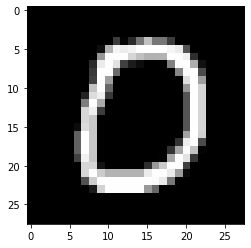

In [60]:
img = x_test[10]

plt.imshow(img, cmap = 'gray')

img = np.reshape(img, (1,28,28))


print(np.argmax(model.predict(img)))

In [55]:
import tensorflow as tf
tf.math.argmax

<function tensorflow.python.ops.math_ops.argmax_v2(input, axis=None, output_type=tf.int64, name=None)>

In [50]:
cv.imwrite('image.png',img)

True

In [65]:
lst = [1,2,3,4,5,6]

print(lst[1 : ])

[2, 3, 4, 5, 6]
